Problem 1

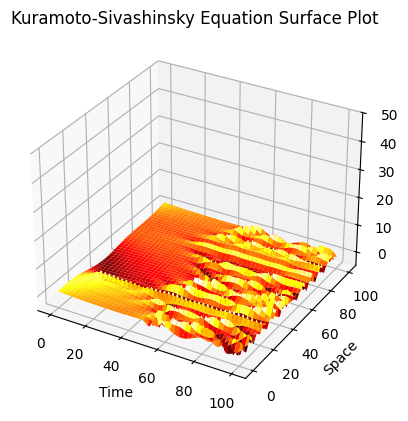

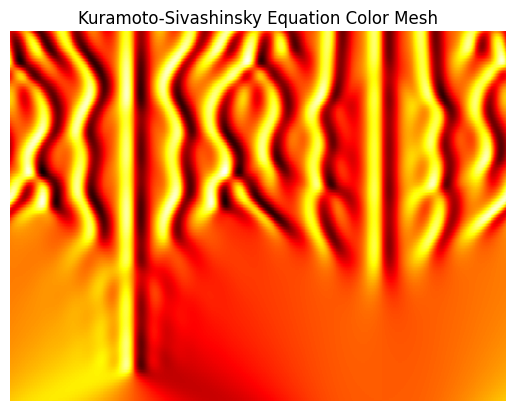

In [1]:
import numpy as np  # Importing the numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting module

# MATLAB: clear all; close all; clc
# Python equivalent:
# Clearing all variables and closing all plots in Python can be done manually or using an IDE feature. 

# % Kuramoto-Sivashinsky equation (from Trefethen)
# % u_t = -u*u_x - u_xx - u_xxxx,  periodic BCs 

# N = 1024;
N = 1024  # Setting the number of spatial points

# x = 32*pi*(1:N)'/N;
x = 32 * np.pi * (np.arange(1, N + 1)) / N  # Creating the spatial grid

# u = cos(x/16).*(1+sin(x/16)); 
u = np.cos(x / 16) * (1 + np.sin(x / 16))  # Initial condition

# v = fft(u);
v = np.fft.fft(u)  # FFT of the initial condition

# % % % % % %
# %Spatial grid and initial condition:
# h = 0.025;
h = 0.025  # Time step

# k = [0:N/2-1 0 -N/2+1:-1]'/16;
k = np.concatenate((np.arange(0, N // 2), [0], np.arange(-N // 2 + 1, 0))) / 16  # Wavenumber vector

# L = k.^2 - k.^4;
L = k ** 2 - k ** 4  # Differential operator in Fourier space

# E = exp(h*L); E2 = exp(h*L/2);
E = np.exp(h * L)  # Exponential term for time integration
E2 = np.exp(h * L / 2)  # Half time step exponential term

# M = 16;
M = 16  # Number of points for complex means

# r = exp(1i*pi*((1:M)-.5)/M);
r = np.exp(1j * np.pi * (np.arange(1, M + 1) - 0.5) / M)  # Complex roots of unity

# LR = h*L(:,ones(M,1)) + r(ones(N,1),:);
LR = h * L[:, np.newaxis] + r[np.newaxis, :]  # Matrix for ETDRK4 method

# Q = h*real(mean( (exp(LR/2)-1)./LR ,2)); 
Q = h * np.real(np.mean((np.exp(LR / 2) - 1) / LR, axis=1))  # Precomputed term for ETDRK4

# f1 = h*real(mean( (-4-LR+exp(LR).*(4-3*LR+LR.^2))./LR.^3 ,2)); 
f1 = h * np.real(np.mean((-4 - LR + np.exp(LR) * (4 - 3 * LR + LR ** 2)) / LR ** 3, axis=1))  # Precomputed term f1

# f2 = h*real(mean( (2+LR+exp(LR).*(-2+LR))./LR.^3 ,2));
f2 = h * np.real(np.mean((2 + LR + np.exp(LR) * (-2 + LR)) / LR ** 3, axis=1))  # Precomputed term f2

# f3 = h*real(mean( (-4-3*LR-LR.^2+exp(LR).*(4-LR))./LR.^3 ,2));
f3 = h * np.real(np.mean((-4 - 3 * LR - LR ** 2 + np.exp(LR) * (4 - LR)) / LR ** 3, axis=1))  # Precomputed term f3

# % Main time-stepping loop:
# uu = u; tt = 0;
uu = np.copy(u)  # Initial state for storing results
tt = np.array([0])  # Initial time array

# tmax = 100; nmax = round(tmax/h); nplt = floor((tmax/250)/h); g = -0.5i*k;
tmax = 100  # Maximum time
nmax = int(round(tmax / h))  # Number of time steps
nplt = int(np.floor((tmax / 250) / h))  # Interval for storing results
g = -0.5j * k  # Fourier multiplier for the nonlinear term

# for n = 1:nmax
for n in range(1, nmax + 1):  # Time-stepping loop
    # t = n*h;
    t = n * h  # Current time
    
    # Nv = g.*fft(real(ifft(v)).^2);
    Nv = g * np.fft.fft(np.real(np.fft.ifft(v)) ** 2)  # Nonlinear term in Fourier space
    
    # a = E2.*v + Q.*Nv;
    a = E2 * v + Q * Nv  # Intermediate step a
    
    # Na = g.*fft(real(ifft(a)).^2);
    Na = g * np.fft.fft(np.real(np.fft.ifft(a)) ** 2)  # Nonlinear term Na
    
    # b = E2.*v + Q.*Na;
    b = E2 * v + Q * Na  # Intermediate step b
    
    # Nb = g.*fft(real(ifft(b)).^2);
    Nb = g * np.fft.fft(np.real(np.fft.ifft(b)) ** 2)  # Nonlinear term Nb
    
    # c = E2.*a + Q.*(2*Nb-Nv);
    c = E2 * a + Q * (2 * Nb - Nv)  # Intermediate step c
    
    # Nc = g.*fft(real(ifft(c)).^2);
    Nc = g * np.fft.fft(np.real(np.fft.ifft(c)) ** 2)  # Nonlinear term Nc
    
    # v = E.*v + Nv.*f1 + 2*(Na+Nb).*f2 + Nc.*f3; 
    v = E * v + Nv * f1 + 2 * (Na + Nb) * f2 + Nc * f3  # Update Fourier coefficients
    
    # if mod(n,nplt)==0
    if n % nplt == 0:  # Store results at intervals
        # u = real(ifft(v));
        u = np.real(np.fft.ifft(v))  # Inverse FFT to get back to physical space
        
        # uu = [uu,u]; 
        uu = np.vstack((uu, u))  # Store the result
        
        # tt = [tt,t]; 
        tt = np.hstack((tt, t))  # Store the time

# % Plot results:
# surf(tt,x,uu), shading interp, colormap(hot), axis tight 
tt, x = np.meshgrid(tt, x)  # Create a meshgrid for plotting
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
surf = ax.plot_surface(tt, x, uu.T, cmap='hot')  # Plot the surface
ax.set_xlabel('Time')  # Label x-axis
ax.set_ylabel('Space')  # Label y-axis
ax.set_zlabel('u')  # Label z-axis
ax.set_title('Kuramoto-Sivashinsky Equation Surface Plot')  # Add a title
ax.set_zlim([-5, 50])  # Set z-axis limits
plt.show()  # Display the plot

# save('kuramoto_sivishinky.mat','x','tt','uu')
np.savez('kuramoto_sivishinky.npz', x=x, tt=tt, uu=uu)  # Save the results

# %%
# figure(2), pcolor(x,tt,uu.'),shading interp, colormap(hot),axis off
plt.figure()  # Create a new figure
plt.pcolormesh(x, tt, uu.T, shading='auto', cmap='hot')  # Plot a color mesh
plt.xlabel('Space')  # Label x-axis
plt.ylabel('Time')  # Label y-axis
plt.title('Kuramoto-Sivashinsky Equation Color Mesh')  # Add a title
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot


Problem 2

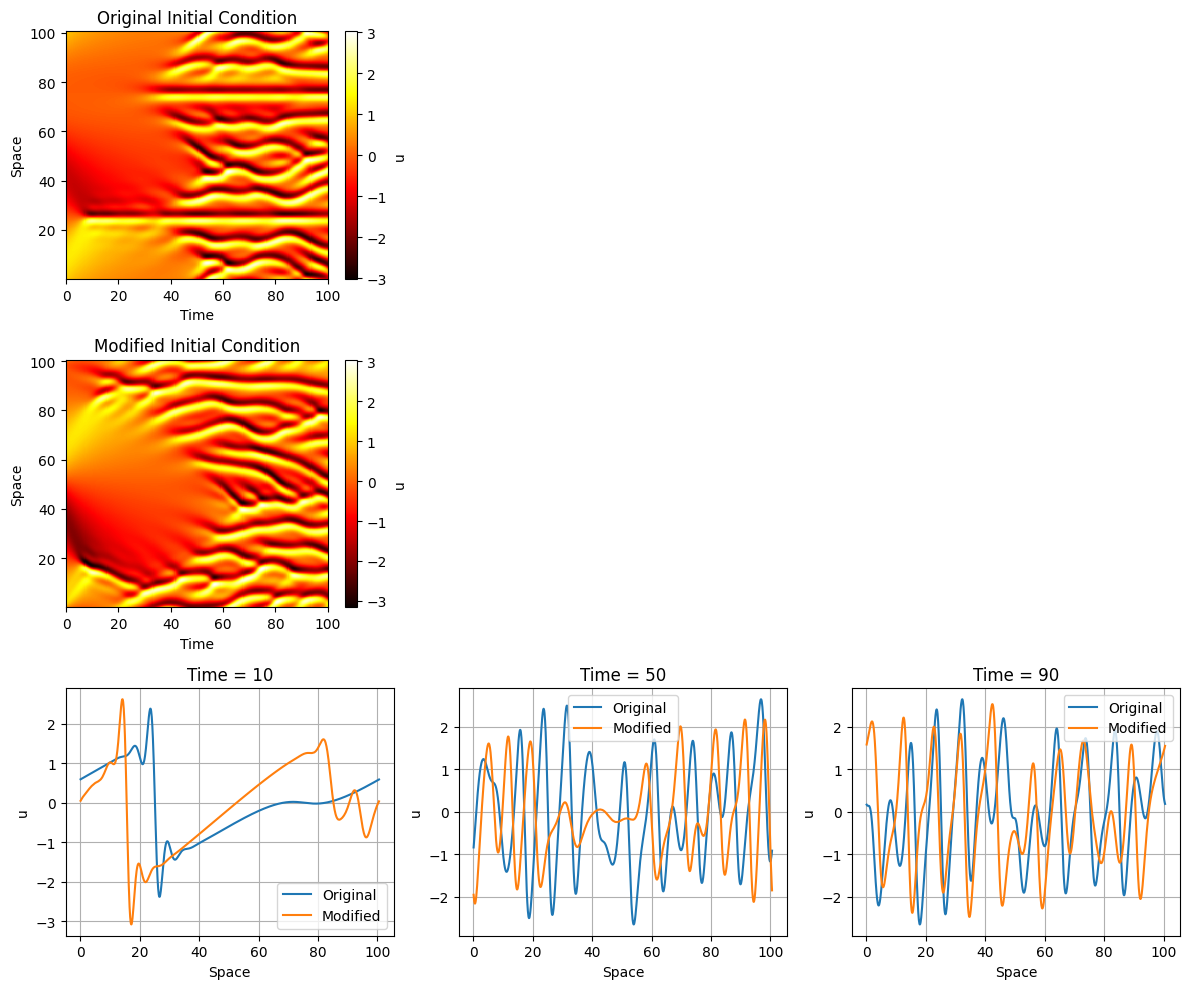

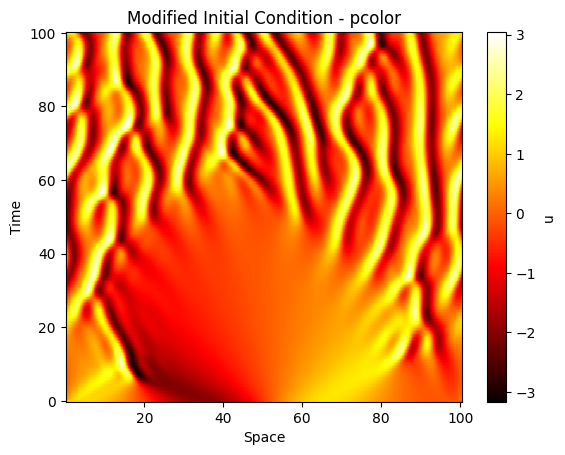

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Kuramoto-Sivashinsky equation (from Trefethen)
# u_t = -u*u_x - u_xx - u_xxxx 

# Parameters and initial conditions
N = 1024  # Number of grid points
x = 32 * np.pi * np.arange(1, N + 1) / N  # Spatial grid
u_original = np.cos(x / 16) * (1 + np.sin(x / 16))  # Original initial condition
v_original = fft(u_original)  # Fourier transform of original initial condition

# Spatial grid and numerical parameters
h = 0.025  # Time step
k = np.concatenate((np.arange(0, N / 2), [0], np.arange(-N / 2 + 1, 0))) / 16  # Wavenumber vector
L = k ** 2 - k ** 4  # Fourier multipliers for spatial derivatives
E = np.exp(h * L)
E2 = np.exp(h * L / 2)
M = 16  # Number of points for exponential integrator
r = np.exp(1j * np.pi * (np.arange(1, M + 1) - 0.5) / M)  # Exponential integrator points
LR = h * L[:, None] + r[None, :]  # Matrix for exponential integrator
Q = h * np.real(np.mean((np.exp(LR / 2) - 1) / LR, axis=1))  # Quadratic nonlinear term
f1 = h * np.real(np.mean((-4 - LR + np.exp(LR) * (4 - 3 * LR + LR ** 2)) / LR ** 3, axis=1))  # Cubic nonlinear term
f2 = h * np.real(np.mean((2 + LR + np.exp(LR) * (-2 + LR)) / LR ** 3, axis=1))  # Cubic nonlinear term
f3 = h * np.real(np.mean((-4 - 3 * LR - LR ** 2 + np.exp(LR) * (4 - LR)) / LR ** 3, axis=1))  # Cubic nonlinear term

# Main time-stepping loop for original initial condition
uu_original = u_original.reshape(-1, 1)  # Array to store solution for original condition
tt = np.array([0])  # Time array initialization
tmax = 100  # Maximum time
nmax = round(tmax / h)  # Number of time steps
nplt = int(np.floor((tmax / 250) / h))  # Plotting interval
g = -0.5j * k  # Nonlinear term in Fourier space

for n in range(1, nmax + 1):
    t = n * h  # Current time
    Nv = g * fft(np.real(ifft(v_original)) ** 2)  # Nonlinear term in Fourier space
    a = E2 * v_original + Q * Nv  # Exponential integrator step
    Na = g * fft(np.real(ifft(a)) ** 2)  # Nonlinear term in Fourier space
    b = E2 * v_original + Q * Na  # Exponential integrator step
    Nb = g * fft(np.real(ifft(b)) ** 2)  # Nonlinear term in Fourier space
    c = E2 * a + Q * (2 * Nb - Nv)  # Exponential integrator step
    Nc = g * fft(np.real(ifft(c)) ** 2)  # Nonlinear term in Fourier space
    v_original = E * v_original + Nv * f1 + 2 * (Na + Nb) * f2 + Nc * f3  # Time-stepping update

    # Store solution for plotting
    if n % nplt == 0:
        u_original = np.real(ifft(v_original))  # Inverse Fourier transform to get u
        uu_original = np.hstack((uu_original, u_original.reshape(-1, 1)))  # Store solution
        tt = np.append(tt, t)  # Update time array

# Task 1: Comparing original and modified initial conditions
div1 = 20 * np.random.rand() + 5  # Random divisor 1
div2 = 20 * np.random.rand() + 5  # Random divisor 2
u_modified = np.cos(x / div1) * (1 + np.sin(x / div2))  # Modified initial condition
v_modified = fft(u_modified)  # Fourier transform of modified initial condition

# Task 3: Saving results for modified condition
uu_modified = u_modified.reshape(-1, 1)
tt_mod = np.array([0])
for n in range(1, nmax + 1):
    t = n * h  # Current time
    Nv = g * fft(np.real(ifft(v_modified)) ** 2)  # Nonlinear term in Fourier space
    a = E2 * v_modified + Q * Nv  # Exponential integrator step
    Na = g * fft(np.real(ifft(a)) ** 2)  # Nonlinear term in Fourier space
    b = E2 * v_modified + Q * Na  # Exponential integrator step
    Nb = g * fft(np.real(ifft(b)) ** 2)  # Nonlinear term in Fourier space
    c = E2 * a + Q * (2 * Nb - Nv)  # Exponential integrator step
    Nc = g * fft(np.real(ifft(c)) ** 2)  # Nonlinear term in Fourier space
    v_modified = E * v_modified + Nv * f1 + 2 * (Na + Nb) * f2 + Nc * f3  # Time-stepping update

    # Store solution for plotting
    if n % nplt == 0:
        u_modified = np.real(ifft(v_modified))  # Inverse Fourier transform to get u
        uu_modified = np.hstack((uu_modified, u_modified.reshape(-1, 1)))  # Store solution
        tt_mod = np.append(tt_mod, t)  # Update time array

# Task 4: Comparing outputs after Task 1 and Task 3
plt.figure(figsize=(12, 10))

# Original initial condition
plt.subplot(3, 3, 1)
plt.pcolormesh(tt, x, uu_original, shading='auto', cmap='hot')
plt.title('Original Initial Condition')
plt.xlabel('Time')
plt.ylabel('Space')
plt.colorbar(label='u')

# Modified initial condition
plt.subplot(3, 3, 4)
plt.pcolormesh(tt_mod, x, uu_modified, shading='auto', cmap='hot')
plt.title('Modified Initial Condition')
plt.xlabel('Time')
plt.ylabel('Space')
plt.colorbar(label='u')

# Line plots for specific time slices
slice_times = [10, 50, 90]  # Time slices to plot
for i, slice_time in enumerate(slice_times):
    idx = np.argmin(np.abs(tt - slice_time))  # Find closest time index 
    plt.subplot(3, 3, 7 + i)  # Adjusting subplot indices to ensure they are within the range 1 to 9
    plt.plot(x, uu_original[:, idx], label='Original')
    idx_mod = np.argmin(np.abs(tt_mod - slice_time))
    plt.plot(x, uu_modified[:, idx_mod], label='Modified')
    plt.title(f'Time = {slice_time}')
    plt.legend()
    plt.xlabel('Space')
    plt.ylabel('u')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Additional lines to show more results:
# Plotting the pcolor of the modified condition
plt.figure()
plt.pcolormesh(x, tt_mod, uu_modified.T, shading='auto', cmap='hot')
plt.title('Modified Initial Condition - pcolor')
plt.xlabel('Space')
plt.ylabel('Time')
plt.colorbar(label='u')
plt.show()

# Save data for potential further analysis (optional)
# np.savez('simulation_and_prediction_results.npz', x=x, tt=tt, uu_original=uu_original, uu_modified=uu_modified)


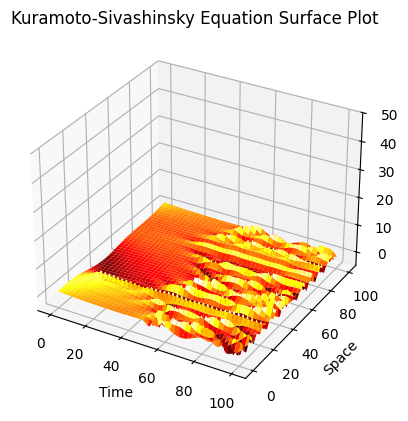

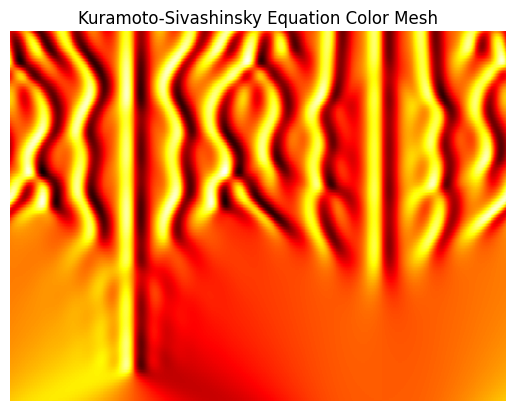

In [3]:
import numpy as np  # Importing the numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting module

# MATLAB: clear all; close all; clc
# Python equivalent:
# Clearing all variables and closing all plots in Python can be done manually or using an IDE feature.

# % Kuramoto-Sivashinsky equation (from Trefethen)
# % u_t = -u*u_x - u_xx - u_xxxx,  periodic BCs 

# N = 1024;
N = 1024  # Setting the number of spatial points

# x = 32*pi*(1:N)'/N;
x = 32 * np.pi * (np.arange(1, N + 1)) / N  # Creating the spatial grid

# u = cos(x/16).*(1+sin(x/16)); 
u = np.cos(x / 16) * (1 + np.sin(x / 16))  # Initial condition

# v = fft(u);
v = np.fft.fft(u)  # FFT of the initial condition

# % % % % % %
# %Spatial grid and initial condition:
# h = 0.025;
h = 0.025  # Time step

# k = [0:N/2-1 0 -N/2+1:-1]'/16;
k = np.concatenate((np.arange(0, N // 2), [0], np.arange(-N // 2 + 1, 0))) / 16  # Wavenumber vector

# L = k.^2 - k.^4;
L = k ** 2 - k ** 4  # Differential operator in Fourier space

# E = exp(h*L); E2 = exp(h*L/2);
E = np.exp(h * L)  # Exponential term for time integration
E2 = np.exp(h * L / 2)  # Half time step exponential term

# M = 16;
M = 16  # Number of points for complex means

# r = exp(1i*pi*((1:M)-.5)/M);
r = np.exp(1j * np.pi * (np.arange(1, M + 1) - 0.5) / M)  # Complex roots of unity

# LR = h*L(:,ones(M,1)) + r(ones(N,1),:);
LR = h * L[:, np.newaxis] + r[np.newaxis, :]  # Matrix for ETDRK4 method

# Q = h*real(mean( (exp(LR/2)-1)./LR ,2)); 
Q = h * np.real(np.mean((np.exp(LR / 2) - 1) / LR, axis=1))  # Precomputed term for ETDRK4

# f1 = h*real(mean( (-4-LR+exp(LR).*(4-3*LR+LR.^2))./LR.^3 ,2)); 
f1 = h * np.real(np.mean((-4 - LR + np.exp(LR) * (4 - 3 * LR + LR ** 2)) / LR ** 3, axis=1))  # Precomputed term f1

# f2 = h*real(mean( (2+LR+exp(LR).*(-2+LR))./LR.^3 ,2));
f2 = h * np.real(np.mean((2 + LR + np.exp(LR) * (-2 + LR)) / LR ** 3, axis=1))  # Precomputed term f2

# f3 = h*real(mean( (-4-3*LR-LR.^2+exp(LR).*(4-LR))./LR.^3 ,2));
f3 = h * np.real(np.mean((-4 - 3 * LR - LR ** 2 + np.exp(LR) * (4 - LR)) / LR ** 3, axis=1))  # Precomputed term f3

# % Main time-stepping loop:
# uu = u; tt = 0;
uu = np.copy(u)  # Initial state for storing results
tt = np.array([0])  # Initial time array

# tmax = 100; nmax = round(tmax/h); nplt = floor((tmax/250)/h); g = -0.5i*k;
tmax = 100  # Maximum time
nmax = int(round(tmax / h))  # Number of time steps
nplt = int(np.floor((tmax / 250) / h))  # Interval for storing results
g = -0.5j * k  # Fourier multiplier for the nonlinear term

# for n = 1:nmax
for n in range(1, nmax + 1):  # Time-stepping loop
    # t = n*h;
    t = n * h  # Current time
    
    # Nv = g.*fft(real(ifft(v)).^2);
    Nv = g * np.fft.fft(np.real(np.fft.ifft(v)) ** 2)  # Nonlinear term in Fourier space
    
    # a = E2.*v + Q.*Nv;
    a = E2 * v + Q * Nv  # Intermediate step a
    
    # Na = g.*fft(real(ifft(a)).^2);
    Na = g * np.fft.fft(np.real(np.fft.ifft(a)) ** 2)  # Nonlinear term Na
    
    # b = E2.*v + Q.*Na;
    b = E2 * v + Q * Na  # Intermediate step b
    
    # Nb = g.*fft(real(ifft(b)).^2);
    Nb = g * np.fft.fft(np.real(np.fft.ifft(b)) ** 2)  # Nonlinear term Nb
    
    # c = E2.*a + Q.*(2*Nb-Nv);
    c = E2 * a + Q * (2 * Nb - Nv)  # Intermediate step c
    
    # Nc = g.*fft(real(ifft(c)).^2);
    Nc = g * np.fft.fft(np.real(np.fft.ifft(c)) ** 2)  # Nonlinear term Nc
    
    # v = E.*v + Nv.*f1 + 2*(Na+Nb).*f2 + Nc.*f3; 
    v = E * v + Nv * f1 + 2 * (Na + Nb) * f2 + Nc * f3  # Update Fourier coefficients
    
    # if mod(n,nplt)==0
    if n % nplt == 0:  # Store results at intervals
        # u = real(ifft(v));
        u = np.real(np.fft.ifft(v))  # Inverse FFT to get back to physical space
        
        # uu = [uu,u]; 
        uu = np.vstack((uu, u))  # Store the result
        
        # tt = [tt,t]; 
        tt = np.hstack((tt, t))  # Store the time

# % Plot results:
# surf(tt,x,uu), shading interp, colormap(hot), axis tight 
tt, x = np.meshgrid(tt, x)  # Create a meshgrid for plotting
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
surf = ax.plot_surface(tt, x, uu.T, cmap='hot')  # Plot the surface
ax.set_xlabel('Time')  # Label x-axis
ax.set_ylabel('Space')  # Label y-axis
ax.set_zlabel('u')  # Label z-axis
ax.set_title('Kuramoto-Sivashinsky Equation Surface Plot')  # Add a title
ax.set_zlim([-5, 50])  # Set z-axis limits
plt.show()  # Display the plot

# save('kuramoto_sivishinky.mat','x','tt','uu')
np.savez('kuramoto_sivishinky.npz', x=x, tt=tt, uu=uu)  # Save the results

# %%
# figure(2), pcolor(x,tt,uu.'),shading interp, colormap(hot),axis off
plt.figure()  # Create a new figure
plt.pcolormesh(x, tt, uu.T, shading='auto', cmap='hot')  # Plot a color mesh
plt.xlabel('Space')  # Label x-axis
plt.ylabel('Time')  # Label y-axis
plt.title('Kuramoto-Sivashinsky Equation Color Mesh')  # Add a title
plt.axis('off')  # Turn off the axis
plt.show()  # Display the plot

Problem 3

C:\Users\Mojtaba Hasanlu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - loss: 1.0005
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - loss: 0.9989
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 583ms/step - loss: 0.9967
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - loss: 0.9938
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - loss: 0.9931
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - loss: 0.9927
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step - loss: 0.9938
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - loss: 0.9942
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - loss: 0.9945
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - loss: 0.9947
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - loss: 0.9952
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - loss: 0.9953
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - loss: 0.9951
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - loss: 0.9955
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 569ms/step - loss: 0.9949
Epoch 16/50
4/4 ━━━

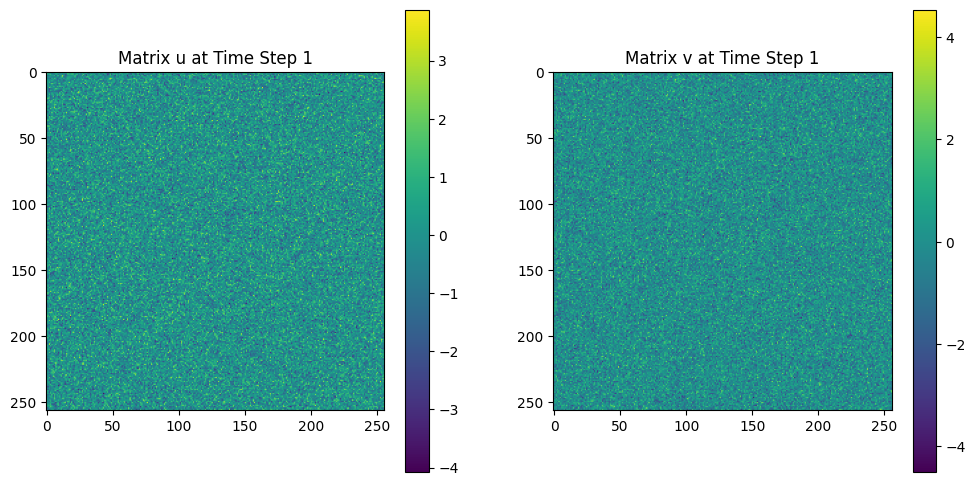

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


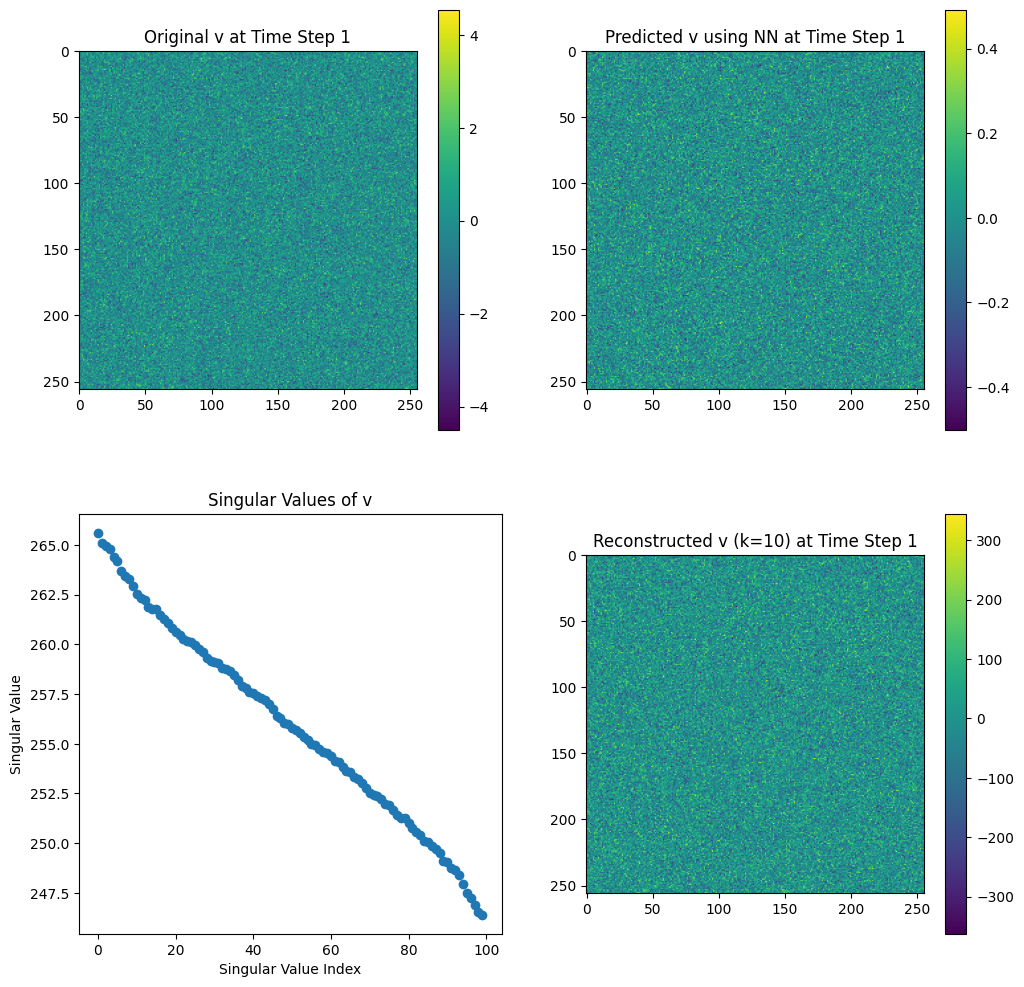

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Data
# Parameters
N = 256           # Dimension size
T = 100           # Time steps

# Generate data
t = np.linspace(0, 10, T)   # Time vector
x = np.linspace(0, 1, N)    # Space vector x
y = np.linspace(0, 1, N)    # Space vector y

# Create random data for u and v
u = np.random.randn(N, N, T)   # u: 256x256x100
v = np.random.randn(N, N, T)   # v: 256x256x100

# Reshape u and v for NN input
u_flat = u.reshape(T, -1)   # Reshape to T x (N*N)
v_flat = v.reshape(T, -1)   # Reshape to T x (N*N)

# Perform SVD on u and v
svd_u = TruncatedSVD(n_components=N, n_iter=7, random_state=42)
svd_v = TruncatedSVD(n_components=N, n_iter=7, random_state=42)

Uu = svd_u.fit_transform(u_flat)
Su = svd_u.singular_values_
Vu = svd_u.components_

Uv = svd_v.fit_transform(v_flat)
Sv = svd_v.singular_values_
Vv = svd_v.components_

# Reshape data for LSTM input (time_steps, input_dim)
u_flat = u_flat.reshape((T, 1, N*N))
v_flat = v_flat.reshape((T, N*N))

# Train RNN using TensorFlow/Keras
inputSize = N * N           # Input size
numHiddenUnits = 100        # Number of hidden units
numClasses = N * N          # Output size

model = Sequential([
    LSTM(numHiddenUnits, input_shape=(1, inputSize), return_sequences=True),
    Dense(numClasses)
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

# Train network using batch processing
batch_size = 32
history = model.fit(u_flat, v_flat, epochs=50, batch_size=batch_size, verbose=1)

# Visualization (example plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(u[:, :, 0])   # Example plot of u at time step 1
plt.title('Matrix u at Time Step 1')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(v[:, :, 0])   # Example plot of v at time step 1
plt.title('Matrix v at Time Step 1')
plt.colorbar()
plt.show()

# Generate predictions using trained networks or methods
v_pred_nn = model.predict(u_flat)

# Reshape predictions back to 3D matrices
v_pred_nn_3d = v_pred_nn.reshape(T, N, N).transpose(1, 2, 0)

# Example: Plot comparison of original v and predicted v using neural network
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(v[:, :, 0])   # Original v at time step 1
plt.title('Original v at Time Step 1')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(v_pred_nn_3d[:, :, 0])   # Predicted v at time step 1 using NN
plt.title('Predicted v using NN at Time Step 1')
plt.colorbar()

# Plot SVD components and reconstructions
plt.subplot(2, 2, 3)
plt.plot(Sv, 'o')    # Singular values of v
plt.title('Singular Values of v')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')

# Reconstruct v using reduced components
k = 10  # Number of singular values to keep
v_reconstructed = np.dot(Uv[:, :k], np.dot(np.diag(Sv[:k]), Vv[:k, :]))
v_reconstructed_3d = v_reconstructed.reshape(T, N, N).transpose(1, 2, 0)

plt.subplot(2, 2, 4)
plt.imshow(v_reconstructed_3d[:, :, 0])   # Reconstructed v at time step 1
plt.title(f'Reconstructed v (k={k}) at Time Step 1')
plt.colorbar()
plt.show()


C:\Users\Mojtaba Hasanlu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - loss: 0.9996
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - loss: 0.9985
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - loss: 0.9964
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - loss: 0.9936
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - loss: 0.9923
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - loss: 0.9924
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - loss: 0.9931
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - loss: 0.9935
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - loss: 0.9941
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - loss: 0.9944
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - loss: 0.9942
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - loss: 0.9947
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - loss: 0.9958
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - loss: 0.9958
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - loss: 0.9950
Epoch 16/50
4/4 ━━━

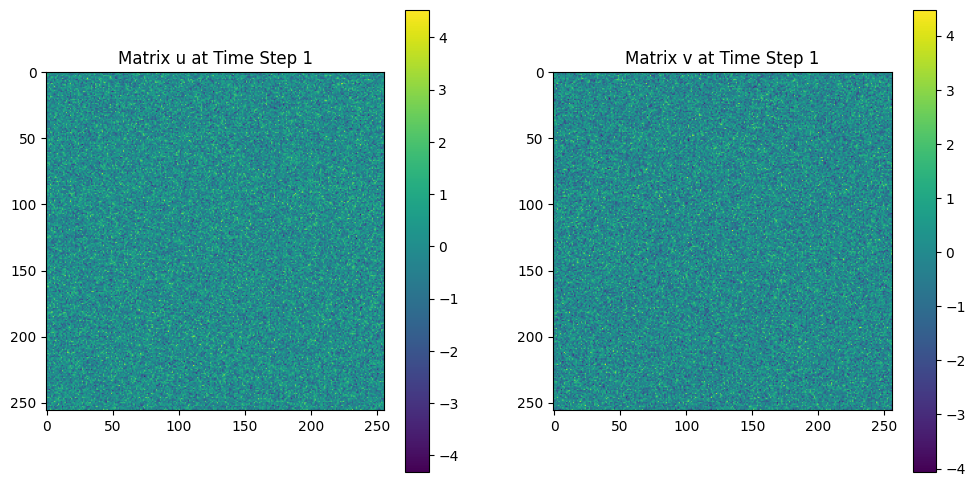

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


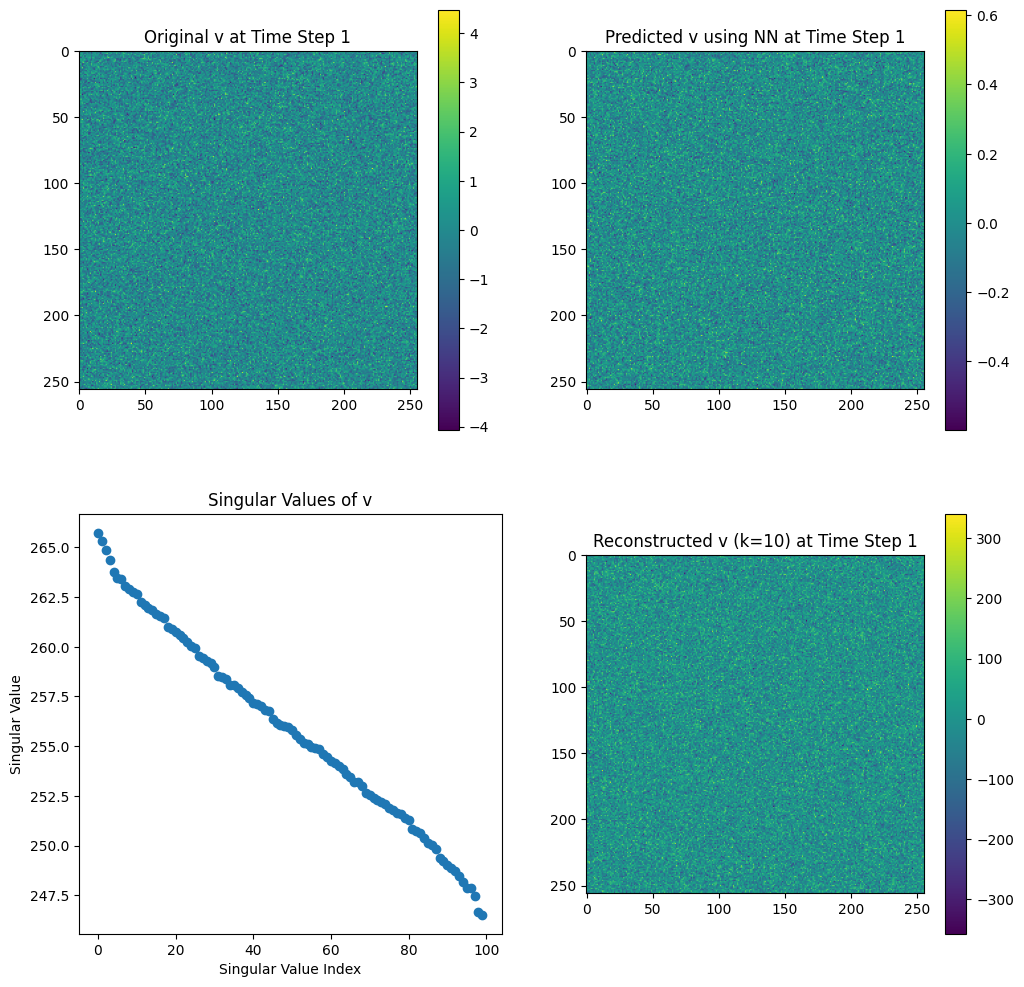

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Data
# Parameters
N = 256           # Dimension size
T = 100           # Time steps

# Generate data
t = np.linspace(0, 10, T)   # Time vector
x = np.linspace(0, 1, N)    # Space vector x
y = np.linspace(0, 1, N)    # Space vector y

# Create random data for u and v
u = np.random.randn(N, N, T)   # u: 256x256x100
v = np.random.randn(N, N, T)   # v: 256x256x100

# Reshape u and v for NN input
u_flat = u.reshape(T, -1)   # Reshape to T x (N*N)
v_flat = v.reshape(T, -1)   # Reshape to T x (N*N)

# Perform SVD on u and v
svd_u = TruncatedSVD(n_components=N, n_iter=7, random_state=42)
svd_v = TruncatedSVD(n_components=N, n_iter=7, random_state=42)

Uu = svd_u.fit_transform(u_flat)
Su = svd_u.singular_values_
Vu = svd_u.components_

Uv = svd_v.fit_transform(v_flat)
Sv = svd_v.singular_values_
Vv = svd_v.components_

# Reshape data for LSTM input (time_steps, input_dim)
u_flat = u_flat.reshape((T, 1, N*N))
v_flat = v_flat.reshape((T, N*N))

# Train RNN using TensorFlow/Keras
inputSize = N * N           # Input size
numHiddenUnits = 100        # Number of hidden units
numClasses = N * N          # Output size

model = Sequential([
    LSTM(numHiddenUnits, input_shape=(1, inputSize), return_sequences=True),
    Dense(numClasses)
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

# Train network using batch processing
batch_size = 32
history = model.fit(u_flat, v_flat, epochs=50, batch_size=batch_size, verbose=1)

# Visualization (example plot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(u[:, :, 0])   # Example plot of u at time step 1
plt.title('Matrix u at Time Step 1')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(v[:, :, 0])   # Example plot of v at time step 1
plt.title('Matrix v at Time Step 1')
plt.colorbar()
plt.show()

# Generate predictions using trained networks or methods
v_pred_nn = model.predict(u_flat)

# Reshape predictions back to 3D matrices
v_pred_nn_3d = v_pred_nn.reshape(T, N, N).transpose(1, 2, 0)

# Example: Plot comparison of original v and predicted v using neural network
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(v[:, :, 0])   # Original v at time step 1
plt.title('Original v at Time Step 1')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(v_pred_nn_3d[:, :, 0])   # Predicted v at time step 1 using NN
plt.title('Predicted v using NN at Time Step 1')
plt.colorbar()

# Plot SVD components and reconstructions
plt.subplot(2, 2, 3)
plt.plot(Sv, 'o')    # Singular values of v
plt.title('Singular Values of v')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')

# Reconstruct v using reduced components
k = 10  # Number of singular values to keep
v_reconstructed = np.dot(Uv[:, :k], np.dot(np.diag(Sv[:k]), Vv[:k, :]))
v_reconstructed_3d = v_reconstructed.reshape(T, N, N).transpose(1, 2, 0)

plt.subplot(2, 2, 4)
plt.imshow(v_reconstructed_3d[:, :, 0])   # Reconstructed v at time step 1
plt.title(f'Reconstructed v (k={k}) at Time Step 1')
plt.colorbar()
plt.show()
